## Rete dei Trasferimenti 

Nodi: Club

Archi: Trasferimenti di giocatori

Peso degli archi: Numero di trasferimenti o valore economico totale

Analisi:
- Identificare i club "hub" nel mercato
- Analizzare i pattern di trasferimento tra leghe
- Studiare la centralità dei club nel mercato

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import community
from community import community_louvain
import numpy as np

# 1. Caricare i dati
clubs = pd.read_csv('../Datasets/SNA/clubs.csv')
transfers = pd.read_csv('../Datasets/SNA/transfers.csv')
competitions = pd.read_csv('../Datasets/SNA/competitions.csv')

In [20]:
print("Prime righe del dataset:")
print(clubs.head())

Prime righe del dataset:
   club_id          club_code                             name  \
0      105    sv-darmstadt-98                  SV Darmstadt 98   
1    11127  ural-ekaterinburg               Ural Yekaterinburg   
2      114  besiktas-istanbul        Beşiktaş Jimnastik Kulübü   
3       12             as-rom       Associazione Sportiva Roma   
4      148  tottenham-hotspur  Tottenham Hotspur Football Club   

  domestic_competition_id  total_market_value  squad_size  average_age  \
0                      L1                 NaN          27         25.6   
1                     RU1                 NaN          30         26.5   
2                     TR1                 NaN          31         26.4   
3                     IT1                 NaN          26         26.4   
4                     GB1                 NaN          27         25.5   

   foreigners_number  foreigners_percentage  national_team_players  \
0                 13                   48.1                    

In [21]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(clubs.info())


Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 1

In [22]:
print("Prime righe del dataset:")
print(transfers.head())

Prime righe del dataset:
   player_id transfer_date transfer_season  from_club_id  to_club_id  \
0     195778    2026-06-30           25/26            79          27   
1     569033    2026-06-30           25/26            39          27   
2     626913    2026-06-30           25/26           398         380   
3    1047109    2026-06-30           25/26          2672         265   
4     302215    2025-12-31           25/26           279          86   

   from_club_name   to_club_name  transfer_fee  market_value_in_eur  \
0   VfB Stuttgart  Bayern Munich           0.0           12000000.0   
1  1.FSV Mainz 05  Bayern Munich           0.0            4000000.0   
2           Lazio    Salernitana           0.0           15000000.0   
3  APO Levadiakos  Panathinaikos           0.0             200000.0   
4     Ferencváros  Werder Bremen           0.0            1000000.0   

       player_name  
0  Alexander Nübel  
1     Armindo Sieb  
2      Boulaye Dia  
3  Georgios Katris  
4       Na

In [23]:
print("Prime righe del dataset:")
print(transfers.head())

Prime righe del dataset:
   player_id transfer_date transfer_season  from_club_id  to_club_id  \
0     195778    2026-06-30           25/26            79          27   
1     569033    2026-06-30           25/26            39          27   
2     626913    2026-06-30           25/26           398         380   
3    1047109    2026-06-30           25/26          2672         265   
4     302215    2025-12-31           25/26           279          86   

   from_club_name   to_club_name  transfer_fee  market_value_in_eur  \
0   VfB Stuttgart  Bayern Munich           0.0           12000000.0   
1  1.FSV Mainz 05  Bayern Munich           0.0            4000000.0   
2           Lazio    Salernitana           0.0           15000000.0   
3  APO Levadiakos  Panathinaikos           0.0             200000.0   
4     Ferencváros  Werder Bremen           0.0            1000000.0   

       player_name  
0  Alexander Nübel  
1     Armindo Sieb  
2      Boulaye Dia  
3  Georgios Katris  
4       Na

In [24]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(competitions.info())


Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   competition_id            44 non-null     object
 1   competition_code          44 non-null     object
 2   name                      44 non-null     object
 3   sub_type                  44 non-null     object
 4   type                      44 non-null     object
 5   country_id                44 non-null     int64 
 6   country_name              36 non-null     object
 7   domestic_league_code      36 non-null     object
 8   confederation             44 non-null     object
 9   url                       44 non-null     object
 10  is_major_national_league  44 non-null     bool  
dtypes: bool(1), int64(1), object(9)
memory usage: 3.6+ KB
None


In [25]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(competitions.info())


Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   competition_id            44 non-null     object
 1   competition_code          44 non-null     object
 2   name                      44 non-null     object
 3   sub_type                  44 non-null     object
 4   type                      44 non-null     object
 5   country_id                44 non-null     int64 
 6   country_name              36 non-null     object
 7   domestic_league_code      36 non-null     object
 8   confederation             44 non-null     object
 9   url                       44 non-null     object
 10  is_major_national_league  44 non-null     bool  
dtypes: bool(1), int64(1), object(9)
memory usage: 3.6+ KB
None


In [26]:
# Filtriamo solo i trasferimenti con fee > 0 e degli ultimi 5 anni
transfers['transfer_date'] = pd.to_datetime(transfers['transfer_date'])
recent_transfers = transfers[
    (transfers['transfer_fee'] > 0) & 
    (transfers['transfer_date'] > '2019-01-01')
]

In [27]:
# 2. Creare il grafo diretto (perché i trasferimenti hanno una direzione)
G = nx.DiGraph()

# Creiamo un dizionario per mappare club_id -> nome
club_names = dict(zip(clubs['club_id'], clubs['name']))

In [28]:
# Aggreghiamo i trasferimenti tra club
transfer_edges = recent_transfers.groupby(['from_club_id', 'to_club_id']).agg({
    'transfer_fee': ['count', 'sum'],
    'player_id': 'count'
}).reset_index()

transfer_edges.columns = ['from', 'to', 'num_transfers', 'total_value', 'num_players']

# Aggiungiamo solo i nodi che hanno trasferimenti
unique_clubs = pd.concat([
    transfer_edges['from'],
    transfer_edges['to']
]).unique()

for club_id in unique_clubs:
    name = club_names.get(club_id, f"Club {club_id}")
    league = clubs[clubs['club_id'] == club_id]['domestic_competition_id'].values[0] if club_id in clubs['club_id'].values else 'Unknown'
    G.add_node(club_id, name=name, league=league)

# Aggiungiamo gli archi
for _, transfer in transfer_edges.iterrows():
    G.add_edge(transfer['from'], 
               transfer['to'], 
               weight=transfer['total_value'],
               num_transfers=transfer['num_transfers'])

In [29]:
# 3. Analisi delle metriche
# Centralità
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [30]:
# Comunità usando il metodo Louvain
communities = community.best_partition(G.to_undirected())

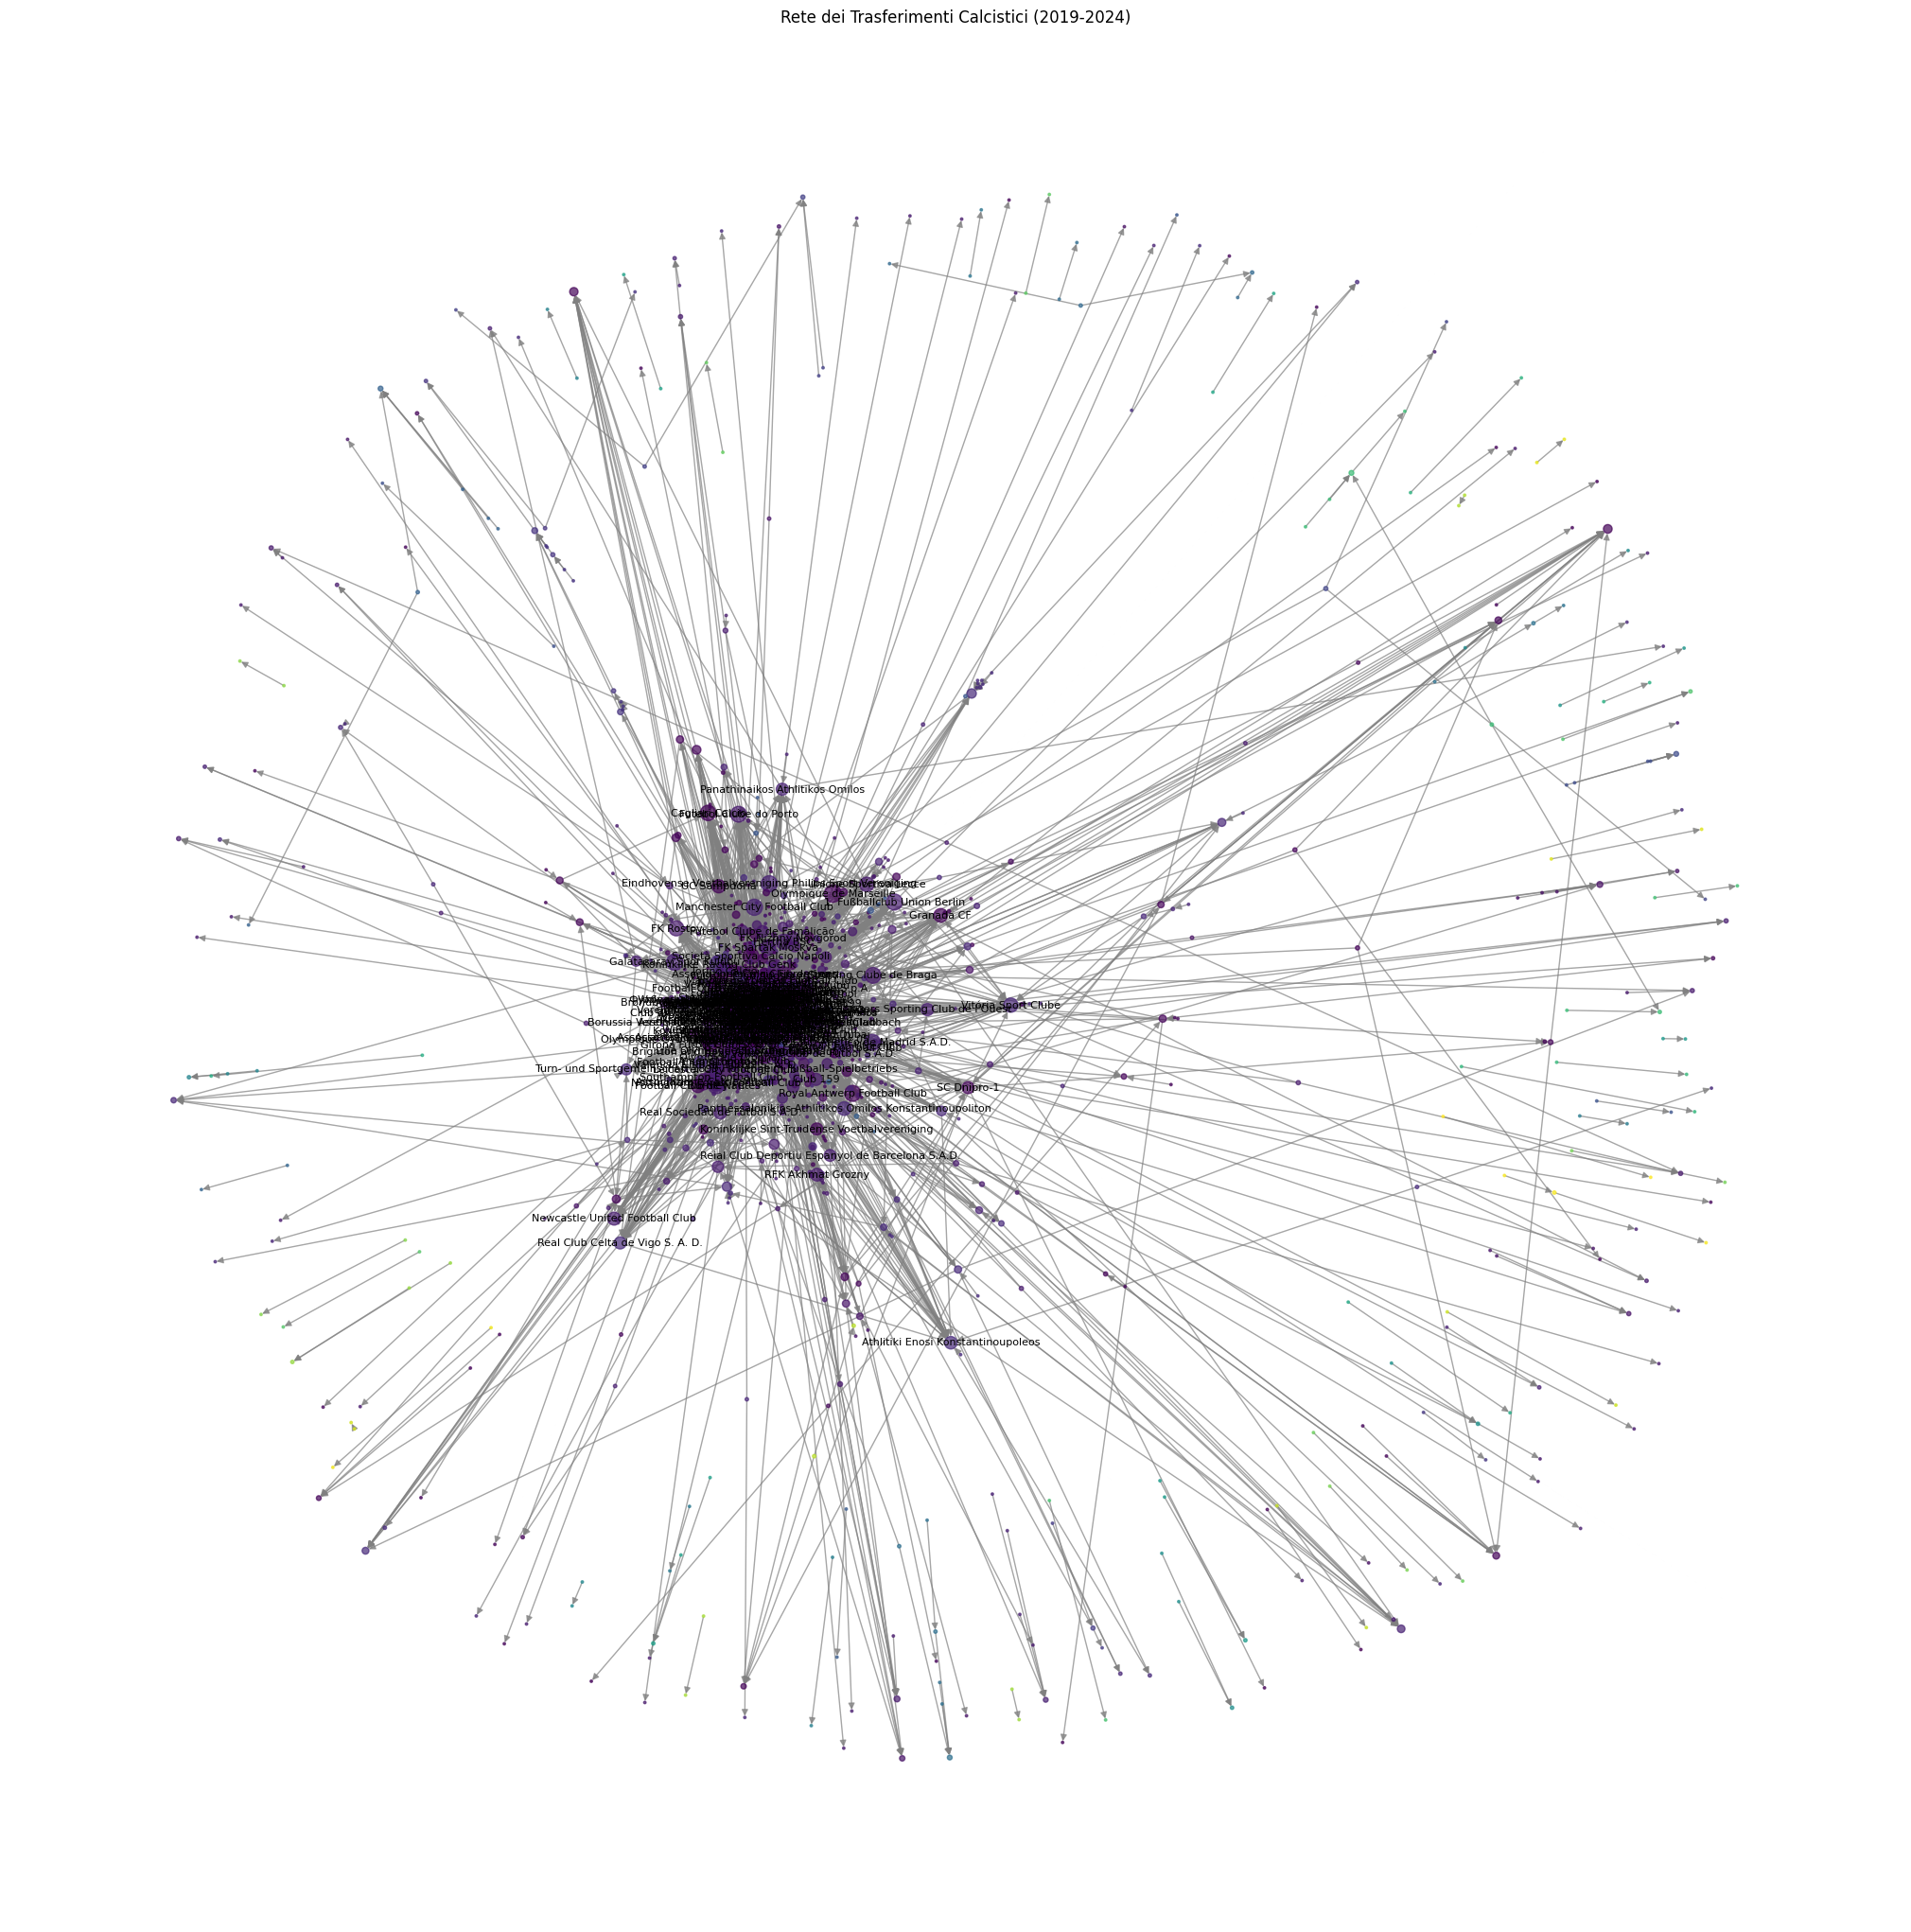

In [32]:
# 4. Visualizzazione
plt.figure(figsize=(20, 20))

# Layout
pos = nx.spring_layout(G, k=1, iterations=50)

# Dimensione nodi basata sulla centralità
node_size = [v * 5000 for v in degree_centrality.values()]

# Colore nodi basato sulle comunità
node_color = [communities[node] for node in G.nodes()]

# Disegno del grafo
nx.draw(G, pos,
        node_size=node_size,
        node_color=node_color,
        with_labels=False,
        edge_color='gray',
        alpha=0.7,
        arrows=True)

# Aggiungiamo etichette solo per i nodi più importanti
labels = {}
for node in G.nodes():
    if degree_centrality[node] > np.percentile(list(degree_centrality.values()), 90):
        name = G.nodes[node]['name']
        labels[node] = name

nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Rete dei Trasferimenti Calcistici (2019-2024)")
plt.show()

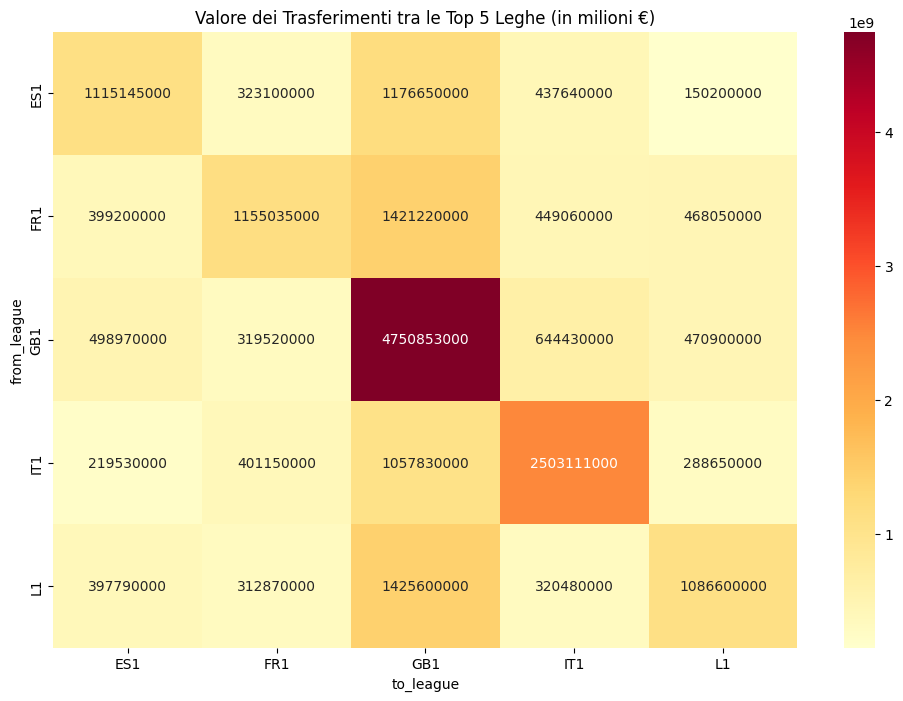

In [33]:
# 5. Analisi delle leghe principali
top_leagues = ['GB1', 'ES1', 'IT1', 'L1', 'FR1']
league_transfers = []

for edge in G.edges():
    from_league = G.nodes[edge[0]].get('league', 'Unknown')
    to_league = G.nodes[edge[1]].get('league', 'Unknown')
    value = G.edges[edge]['weight']
    if from_league in top_leagues and to_league in top_leagues:
        league_transfers.append([from_league, to_league, value])

league_df = pd.DataFrame(league_transfers, columns=['from_league', 'to_league', 'value'])
league_matrix = league_df.pivot_table(
    index='from_league', 
    columns='to_league', 
    values='value',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(league_matrix, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title("Valore dei Trasferimenti tra le Top 5 Leghe (in milioni €)")
plt.show()

In [34]:
# 6. Statistiche chiave
print("\nTop 10 club per centralità:")
centrality_df = pd.DataFrame({
    'Club': [G.nodes[node]['name'] for node in G.nodes()],
    'Degree': list(degree_centrality.values()),
    'In_Degree': list(in_degree_centrality.values()),
    'Out_Degree': list(out_degree_centrality.values()),
    'Betweenness': list(betweenness_centrality.values())
})

print(centrality_df.nlargest(10, 'Degree'))



Top 10 club per centralità:
                                             Club    Degree  In_Degree  \
130                   Stade Rennais Football Club  0.047747   0.024210   
244                            AFC Ajax Amsterdam  0.043040   0.022192   
139                        Sport Lisboa e Benfica  0.042367   0.018157   
418                  Koninklijke Racing Club Genk  0.041022   0.020175   
492     Club Brugge Koninklijke Voetbalvereniging  0.041022   0.022192   
28                         Fenerbahçe Spor Kulübü  0.039677   0.027572   
85   Association sportive de Monaco Football Club  0.038332   0.020847   
132                   Verona Hellas Football Club  0.038332   0.026900   
364                            Olympique Lyonnais  0.037660   0.018830   
19                 Eintracht Frankfurt Fußball AG  0.035642   0.021520   

     Out_Degree  Betweenness  
130    0.023537     0.008567  
244    0.020847     0.011757  
139    0.024210     0.008479  
418    0.020847     0.007838  
4

In [36]:
# 7. Metriche di rete avanzate
print("\nMetriche di rete:")
print(f"Numero di nodi: {G.number_of_nodes()}")
print(f"Numero di archi: {G.number_of_edges()}")
print(f"Densità della rete: {nx.density(G):.4f}")


Metriche di rete:
Numero di nodi: 1488
Numero di archi: 5355
Densità della rete: 0.0024


In [37]:
# Analisi delle componenti connesse
undirected_G = G.to_undirected()
components = list(nx.connected_components(undirected_G))
print(f"\nNumero di componenti connesse: {len(components)}")
print(f"Dimensione della componente più grande: {len(max(components, key=len))}")


Numero di componenti connesse: 58
Dimensione della componente più grande: 1350


In [42]:
# Analisi della componente gigante
giant = G.subgraph(max(components, key=len))
print("\nMetriche della componente gigante:")
print(f"Numero di nodi: {giant.number_of_nodes()}")
print(f"Numero di archi: {giant.number_of_edges()}")
print(f"Densità: {nx.density(giant):.4f}")
print(f"Diametro: {nx.diameter(giant.to_undirected())}")


Metriche della componente gigante:
Numero di nodi: 1350
Numero di archi: 5274
Densità: 0.0029
Diametro: 10


In [43]:
# Analisi delle componenti fortemente connesse
strongly_connected = list(nx.strongly_connected_components(G))
print(f"\nNumero di componenti fortemente connesse: {len(strongly_connected)}")
print(f"Dimensione della componente fortemente connessa più grande: {len(max(strongly_connected, key=len))}")


Numero di componenti fortemente connesse: 1027
Dimensione della componente fortemente connessa più grande: 461


In [44]:
# Calcolo del coefficiente di clustering
clustering_coeff = nx.average_clustering(G.to_undirected())
print(f"\nCoefficiente di clustering medio: {clustering_coeff:.4f}")


Coefficiente di clustering medio: 0.0521


In [45]:
# Analisi dell'assortatività per lega
assortativity = nx.attribute_assortativity_coefficient(G, 'league')
print(f"Assortatività per lega: {assortativity:.4f}")

Assortatività per lega: 0.2704


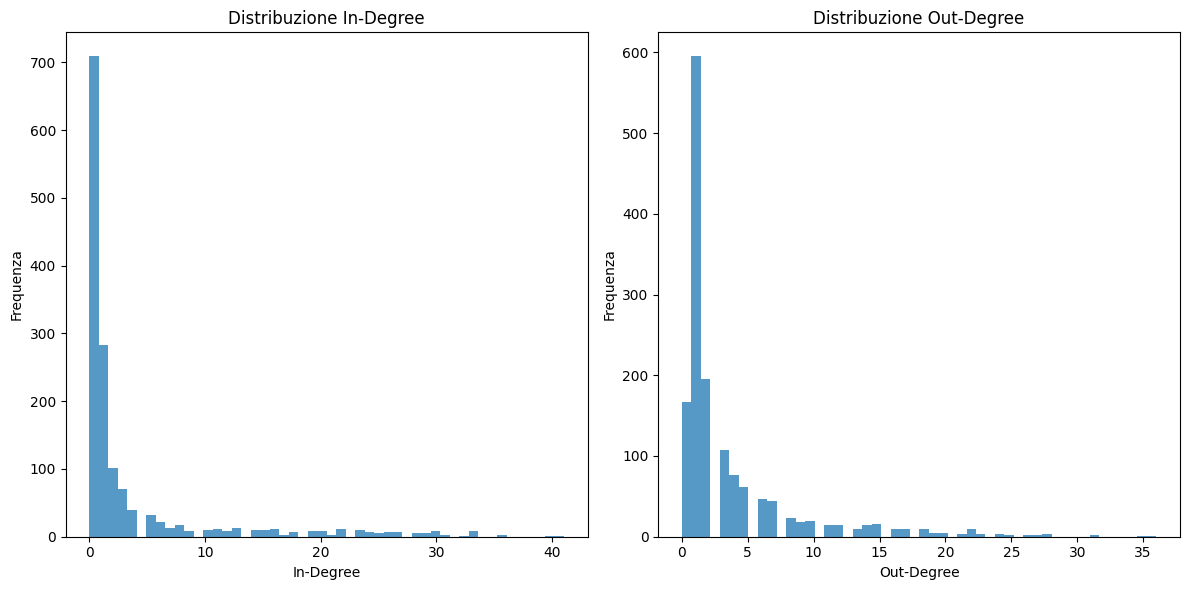

In [39]:
# 8. Distribuzione dei gradi
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(in_degrees, bins=50, alpha=0.75)
plt.title("Distribuzione In-Degree")
plt.xlabel("In-Degree")
plt.ylabel("Frequenza")

plt.subplot(122)
plt.hist(out_degrees, bins=50, alpha=0.75)
plt.title("Distribuzione Out-Degree")
plt.xlabel("Out-Degree")
plt.ylabel("Frequenza")
plt.tight_layout()
plt.show()

In [40]:
# 9. Top club per varie metriche
print("\nTop 5 club per In-Degree (acquisti):")
in_degree_dict = dict(G.in_degree())
top_in = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
for club_id, degree in top_in:
    print(f"{G.nodes[club_id]['name']}: {degree}")

print("\nTop 5 club per Out-Degree (vendite):")
out_degree_dict = dict(G.out_degree())
top_out = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
for club_id, degree in top_out:
    print(f"{G.nodes[club_id]['name']}: {degree}")


Top 5 club per In-Degree (acquisti):
Fenerbahçe Spor Kulübü: 41
Verona Hellas Football Club: 40
Genoa Cricket and Football Club: 36
Stade Rennais Football Club: 36
Nottingham Forest Football Club: 36

Top 5 club per Out-Degree (vendite):
Sport Lisboa e Benfica: 36
Stade Rennais Football Club: 35
AFC Ajax Amsterdam: 31
Koninklijke Racing Club Genk: 31
Royal Sporting Club Anderlecht: 28


In [46]:
# Top club per volume di trasferimenti in entrata
in_transfer_volume = {}
for node in G.nodes():
    in_edges = G.in_edges(node, data=True)
    volume = sum(edge[2]['weight'] for edge in in_edges)
    in_transfer_volume[node] = volume

print("\nTop 5 club per volume di acquisti:")
top_buyers = sorted(in_transfer_volume.items(), key=lambda x: x[1], reverse=True)[:5]
for club_id, volume in top_buyers:
    print(f"{G.nodes[club_id]['name']}: {volume:.2f}M €")

# Top club per volume di trasferimenti in uscita
out_transfer_volume = {}
for node in G.nodes():
    out_edges = G.out_edges(node, data=True)
    volume = sum(edge[2]['weight'] for edge in out_edges)
    out_transfer_volume[node] = volume

print("\nTop 5 club per volume di vendite:")
top_sellers = sorted(out_transfer_volume.items(), key=lambda x: x[1], reverse=True)[:5]
for club_id, volume in top_sellers:
    print(f"{G.nodes[club_id]['name']}: {volume:.2f}M €")


Top 5 club per volume di acquisti:
Chelsea Football Club: 1728150000.00M €
Manchester United Football Club: 1046770000.00M €
Paris Saint-Germain Football Club: 1014420000.00M €
Tottenham Hotspur Football Club: 923250000.00M €
Arsenal Football Club: 922400000.00M €

Top 5 club per volume di vendite:
Sport Lisboa e Benfica: 790060000.00M €
AFC Ajax Amsterdam: 771510000.00M €
Chelsea Football Club: 659940000.00M €
Club Atlético de Madrid S.A.D.: 597400000.00M €
Manchester City Football Club: 585970000.00M €


In [47]:
# 10. Analisi del bilancio di mercato
market_balance = {}
for node in G.nodes():
    balance = out_transfer_volume.get(node, 0) - in_transfer_volume.get(node, 0)
    market_balance[node] = balance

print("\nTop 5 club con bilancio positivo (vendite > acquisti):")
top_positive = sorted(market_balance.items(), key=lambda x: x[1], reverse=True)[:5]
for club_id, balance in top_positive:
    print(f"{G.nodes[club_id]['name']}: {balance:.2f}M €")

print("\nTop 5 club con bilancio negativo (acquisti > vendite):")
top_negative = sorted(market_balance.items(), key=lambda x: x[1])[:5]
for club_id, balance in top_negative:
    print(f"{G.nodes[club_id]['name']}: {balance:.2f}M €")


Top 5 club con bilancio positivo (vendite > acquisti):
AFC Ajax Amsterdam: 413360000.00M €
Sport Lisboa e Benfica: 356260000.00M €
Club 409: 323940000.00M €
Lille Olympique Sporting Club: 293750000.00M €
Eindhovense Voetbalvereniging Philips Sport Vereniging: 187750000.00M €

Top 5 club con bilancio negativo (acquisti > vendite):
Chelsea Football Club: -1068210000.00M €
Manchester United Football Club: -782900000.00M €
Paris Saint-Germain Football Club: -751320000.00M €
Arsenal Football Club: -671150000.00M €
Tottenham Hotspur Football Club: -609600000.00M €


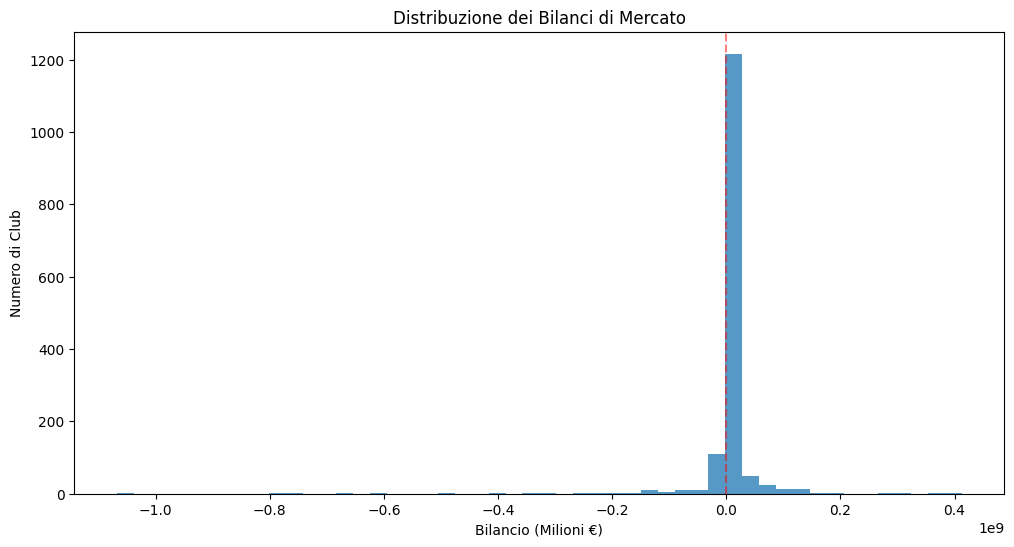

In [48]:
# Visualizzazione della distribuzione dei bilanci
plt.figure(figsize=(12, 6))
balances = list(market_balance.values())
plt.hist(balances, bins=50, alpha=0.75)
plt.title("Distribuzione dei Bilanci di Mercato")
plt.xlabel("Bilancio (Milioni €)")
plt.ylabel("Numero di Club")
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.show()

In [49]:
# 11. Analisi delle comunità
communities = community.best_partition(G.to_undirected())
num_communities = len(set(communities.values()))
print(f"\nNumero di comunità rilevate: {num_communities}")

# Dimensione delle comunità
community_sizes = pd.Series(communities.values()).value_counts()
print("\nDimensioni delle 5 comunità più grandi:")
print(community_sizes.head())


Numero di comunità rilevate: 74

Dimensioni delle 5 comunità più grandi:
6     259
4     216
1     172
10    167
2     134
Name: count, dtype: int64
